# Question 1

Text(0.5, 1.0, 'Training Data')

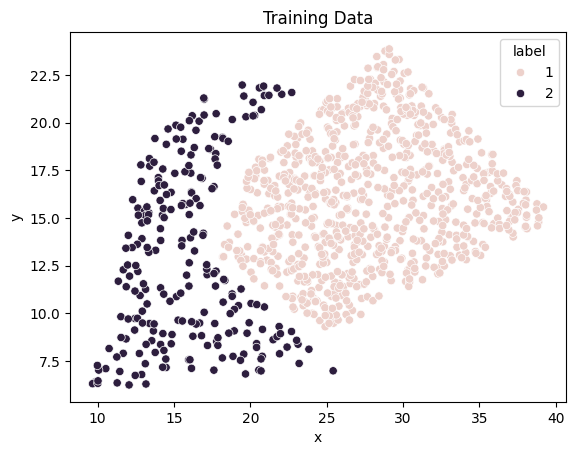

In [ ]:
#Question 1

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

train_df = pd.read_csv('/content/training_data.csv')
test_df = pd.read_csv('/content/test_data.csv')


sns.scatterplot(x = 'x', y = 'y', data = train_df, hue = 'label')
plt.title('Training Data')

Text(0.5, 1.0, 'Test Data')

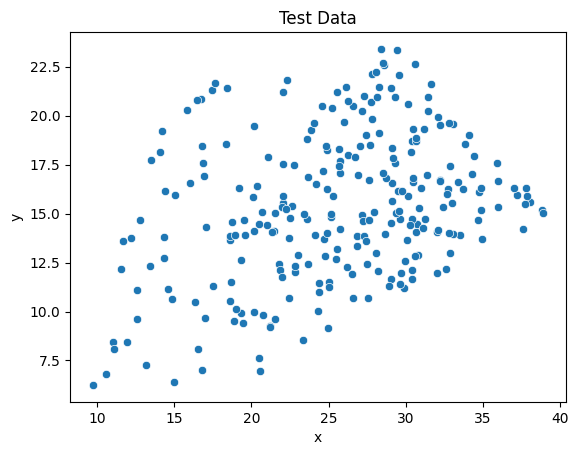

In [ ]:
sns.scatterplot(x = 'x', y = 'y', data = test_df)
plt.title('Test Data')

In [ ]:
#Question 2
tuples = list(zip(train_df['x'], train_df['y']))
print(tuples)

[(25.206642095921914, 9.68429380343551), (28.47163415474273, 12.314793436240253), (27.81181970128864, 12.342327952813966), (33.709347441480695, 18.998067520124668), (26.102420808562925, 11.398683754422256), (14.874633499633411, 8.890442306417421), (31.671601564098005, 20.35881014964756), (21.16197207450932, 16.91676338487798), (26.853710795166304, 18.87656916265841), (22.780126875083106, 10.90001345748793), (25.153416131601407, 17.526743664951542), (31.3231927627028, 16.142386286221626), (22.577318048652824, 17.388326976848518), (24.05628459084228, 10.001035143496884), (34.171470757863524, 17.810538597261996), (23.46411390601207, 10.40280215760206), (24.553397482678925, 17.975269056317334), (30.054853068625462, 18.876004723489824), (12.905382158670736, 13.919562523211424), (21.68641398873049, 12.340223712450651), (28.316144008326603, 22.89884735991845), (20.925819332634195, 11.44473879726682), (25.312586724866343, 10.89385328538216), (27.045990664364933, 17.20999792647029), (37.4557789

#Question 2-b(Code  for precision, recall,specificity and f-measure)

In [ ]:
def metrics(predicted,actual):


    label_domain = np.unique(actual)
    Positive = label_domain[0]
    Negative = label_domain[1]
    TN = TP = FP = FN = 0
    print('Considering : ')
    print(f'label {Positive} as Class 1' )
    print(f'label {Negative} as Class 2' )
    for pred_label,actual_label in zip(predicted,actual):

        if pred_label == Positive and pred_label == actual_label:
            TP = TP + 1

        if pred_label == Negative and pred_label == actual_label:
            TN = TN + 1

        if pred_label == Negative and pred_label != actual_label:
            FN = FN + 1

        if pred_label == Positive and pred_label != actual_label:
            FP = FP + 1

    accuracy = (TP+TN)/(TP+TN+FP+FN)* 100

    precision = (TP)/(TP + FP)* 100

    recall = (TP)/(TP + FN)* 100

    f1 = (2 * accuracy * precision) / (accuracy + precision)

    sensitivity = (TP)/(TP + FN)* 100

    specificity = (TN)/(TN + FP)* 100


    table = {'Accuracy':[accuracy],'Precision':[precision],'Recall':[recall],'F1':[f1],'Sensitivity':[sensitivity],'Specificity':[specificity]}

    df = pd.DataFrame(table)
    print(df)

# Question 2 - a

# **Decision Tree**

In [ ]:
from sklearn import tree
A = tuples
B = train_df['label']


In [ ]:
X,x_test,Y,label_test = sklearn.model_selection.train_test_split(A,B,test_size=0.2,random_state=56)

In [ ]:
dtc = tree.DecisionTreeClassifier()         #bydefault criteria =gini , splitter = best
dtc = dtc.fit(X,Y)
a = dtc.predict(x_test)
print(a)

[1 1 1 1 2 1 1 1 1 2 1 2 1 1 1 1 2 1 2 1 1 2 1 1 1 1 1 1 1 1 2 1 2 1 2 1 1
 1 1 2 2 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 1 2 1 1 2 1 2 1 2 1 1 1
 1 1 2 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 2 1 2 2 1 1
 2 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 2 1 2 1 1 1
 1 1 1 1 1 1 1 1 2 1 2 2 1 1 1 1 1 1 2 1 1]


In [ ]:
dtc.score(X,Y)

1.0

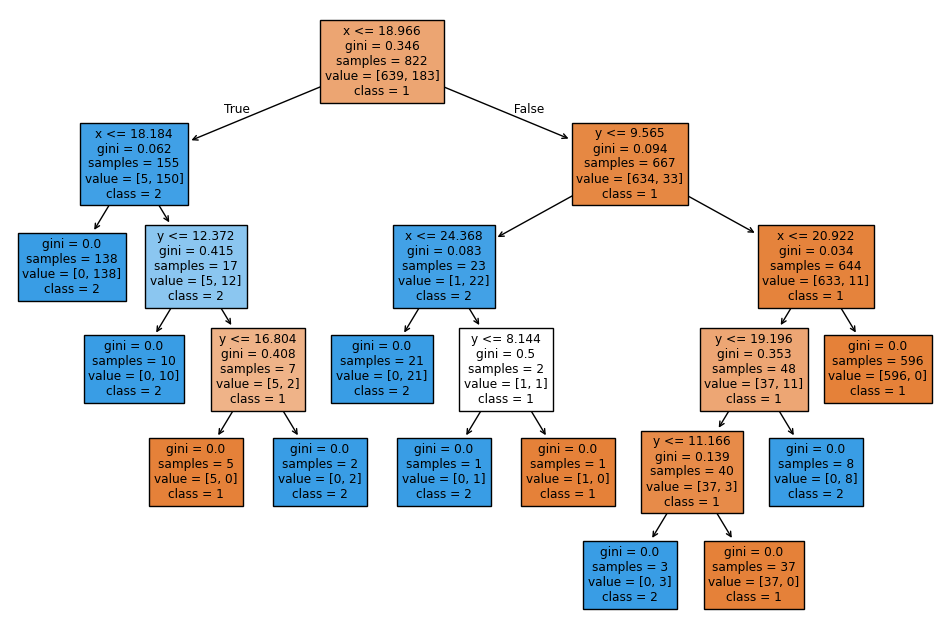

In [ ]:
plt.figure(figsize=(12,8))
tree.plot_tree(dtc, filled=True, feature_names=['x', 'y'], class_names=['1', '2']);

In [ ]:
search_space = {'criterion':['gini','entropy','log_loss'],
                'splitter':['best','random']}

In [ ]:
from sklearn.model_selection import GridSearchCV

GS1 = GridSearchCV(estimator = dtc,
                  param_grid = search_space,
                  cv = 5)

In [ ]:
GS1.fit(X,Y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'splitter': ['best', 'random']})

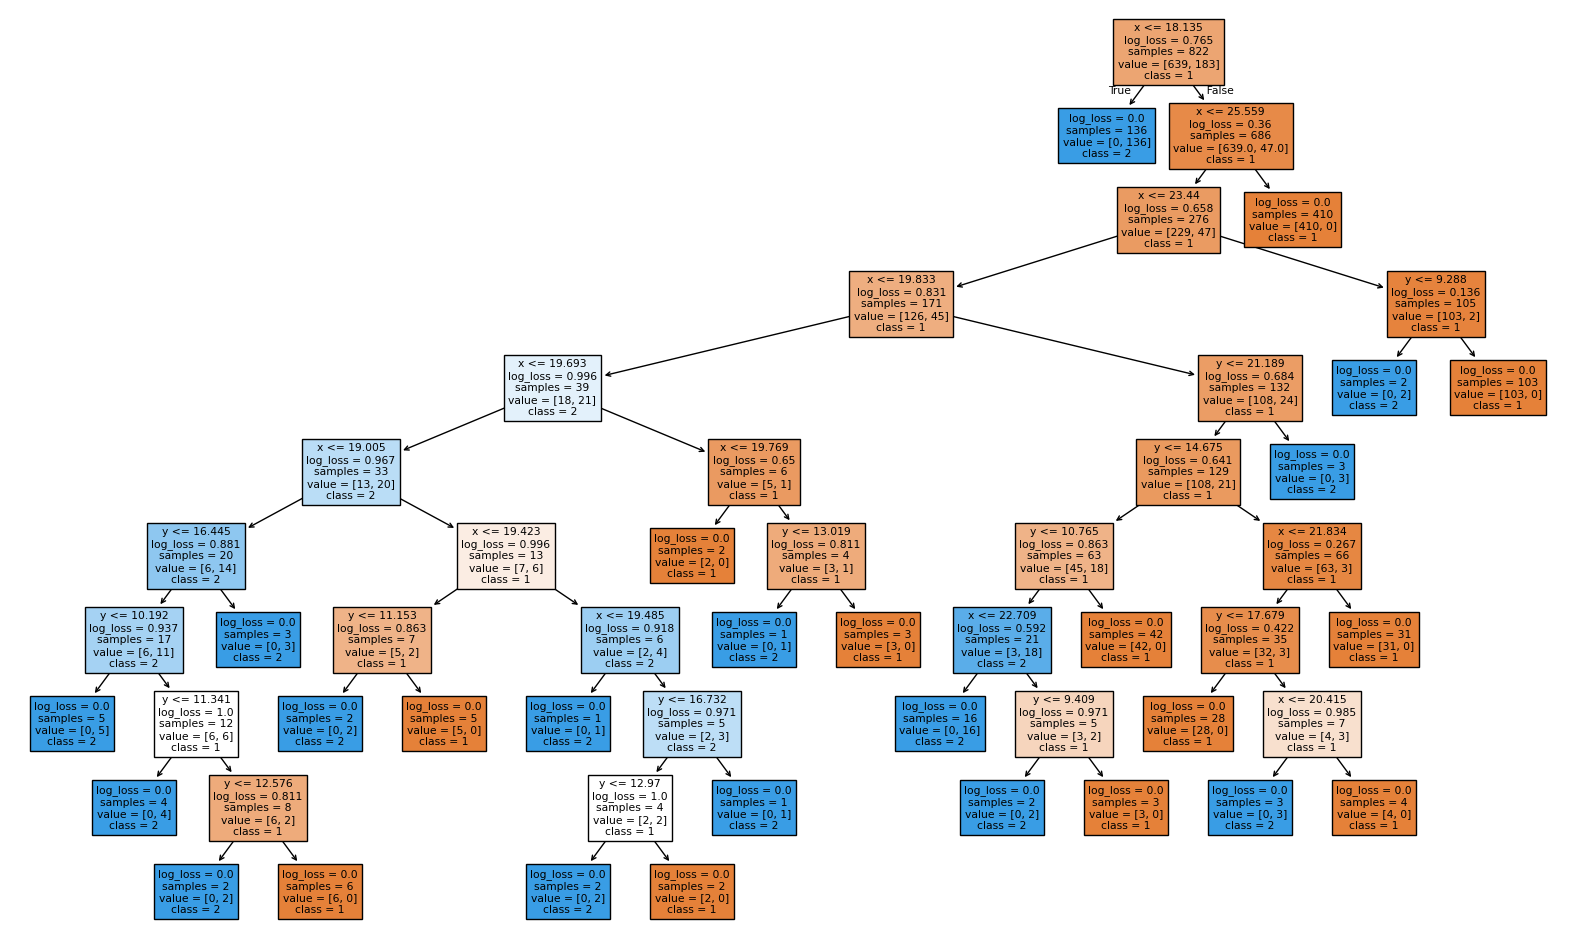

In [ ]:
plt.figure(figsize=(20,12))
tree.plot_tree(GS1.best_estimator_ , filled=True, feature_names=['x', 'y'], class_names=['1', '2']);

In [ ]:
print(GS1.best_params_)

{'criterion': 'log_loss', 'splitter': 'random'}


In [ ]:
print(GS1.best_score_)

0.9927124907612713


In [ ]:
#dtc1 = tree.DecisionTreeClassifier('criterion': 'log_loss', 'splitter': 'random')

b = np.array(GS1.predict(x_test))
c = np.array(label_test)
print(b)

[1 1 1 2 2 1 1 1 1 2 1 2 1 1 2 1 2 1 2 1 1 2 1 1 1 1 1 2 1 1 2 1 2 1 2 2 1
 1 1 1 2 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 1 2 1 1 2 1 2 1 2 1 1 1
 1 1 2 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 2 2 1 1
 2 1 1 2 1 2 1 1 1 1 1 2 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 2 1 2 1 1 1
 1 1 1 1 1 1 1 1 2 1 2 2 1 1 1 1 1 1 2 1 1]


In [ ]:
metrics(b,c)

Considering : 
label 1 as Class 1
label 2 as Class 2
    Accuracy  Precision  Recall         F1  Sensitivity  Specificity
0  97.087379     98.125  98.125  97.603432       98.125    93.478261


## **K Nearest Neighbours**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X,Y)

KNeighborsClassifier()

In [ ]:
knn.score(X,Y)

1.0

In [ ]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],        # Number of neighbors
    'weights': ['uniform', 'distance'], # Uniform vs distance-based weighting
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metrics
}

In [ ]:
GS2 = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

In [ ]:
GS2.fit(X,Y)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
print(GS2.best_params_)

{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}


In [ ]:
print(GS2.best_score_)

0.998780487804878


In [ ]:
d = np.array(GS2.predict(x_test))

print(d)

[1 1 1 2 2 1 1 1 1 2 1 2 1 1 1 1 2 1 2 1 1 2 1 1 1 1 1 1 1 1 2 1 2 1 2 2 1
 1 1 2 2 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 1 2 1 1 2 1 2 1 2 1 2 1
 1 1 2 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 2 1 2 2 1 1
 2 1 1 2 1 2 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 2 1 2 1 1 1
 1 1 1 1 1 1 1 1 2 1 2 2 1 1 1 1 1 1 2 1 1]


In [ ]:
metrics(d,c)

Considering : 
label 1 as Class 1
label 2 as Class 2
    Accuracy  Precision  Recall         F1  Sensitivity  Specificity
0  99.514563  99.378882   100.0  99.446676        100.0    97.826087


# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,Y)

LogisticRegression()

In [ ]:
log_reg.score(X,Y)

0.9574209245742092

In [ ]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],        # Regularization type
    'solver': ['liblinear']          # Solver for small datasets and L1/L2 penalties
}

In [ ]:
GS3 =  GridSearchCV(estimator=log_reg, param_grid=param_grid,
                           cv=5, scoring='accuracy', verbose=1)

In [ ]:
GS3.fit(X,Y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy', verbose=1)

In [ ]:
print(GS3.best_params_)

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
print(GS3.best_score_)

0.9598373983739836


In [ ]:
e = np.array(GS3.predict(x_test))

print(e)

[1 1 1 1 2 1 1 1 1 2 1 2 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 2 1 1 2 1 2 1 2 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 1 2 1 1 1 1 2 1 1 1 2 1
 1 1 2 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 2 2 1 1
 2 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 2 1 2 1 1 1
 1 1 1 1 1 1 1 1 2 1 2 2 1 1 1 1 1 2 2 1 1]


In [ ]:
metrics(e,c)

Considering : 
label 1 as Class 1
label 2 as Class 2
    Accuracy  Precision  Recall         F1  Sensitivity  Specificity
0  93.203883  93.452381  98.125  93.327967       98.125    76.086957


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X,Y)

RandomForestClassifier()

In [ ]:
rf.score(X,Y)

1.0

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [ ]:
GS4 = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [ ]:
GS4.fit(X,Y)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [ ]:
print(GS4.best_params_)

{'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
print(GS4.best_score_)

0.9951293422025129


In [ ]:
f = np.array(GS4.predict(x_test))

print(f)

[1 1 1 1 2 1 1 1 1 2 1 2 1 1 1 1 2 1 2 1 1 2 1 1 1 1 1 1 1 1 2 1 2 1 2 1 1
 1 1 2 2 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 1 2 1 1 2 1 2 1 2 1 2 1
 1 1 2 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 2 1 2 2 1 1
 2 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 2 1 2 1 1 1
 1 1 1 1 1 1 1 1 2 1 2 2 1 1 1 1 1 1 2 1 1]


In [ ]:
metrics(f,c)

Considering : 
label 1 as Class 1
label 2 as Class 2
    Accuracy  Precision  Recall         F1  Sensitivity  Specificity
0  98.058252  97.560976   100.0  97.808982        100.0    91.304348


### After analyzing the results we can see that KNN is the best classifier among these four classifiers.

In [ ]:
tup = list(zip(test_df['x'], test_df['y']))
print(tup)

[(26.9163186004956, 16.9522137444032), (27.1907753421333, 20.25487287293), (33.8660793980737, 18.5411244168532), (29.925170702584, 11.2231721194952), (18.6722295572718, 11.5060353730193), (28.4302106784967, 23.4101474287547), (13.3834218597149, 12.317960917148), (18.6328564947074, 10.5512945387642), (16.5443543846897, 8.09388173677093), (17.5321345728573, 11.3043188332264), (19.3221675465409, 9.90882526404402), (22.3163179993281, 21.810555810424), (31.0139408550421, 16.3260000634088), (27.8354628276427, 22.1488653143492), (16.8460956538373, 17.5645781494511), (18.3318850048228, 18.5736420014009), (23.5797336138397, 18.8201133127596), (21.078087805846, 17.9163808255798), (24.8995063877384, 16.2658693465822), (18.7588199156551, 14.5801034471468), (24.6722139641369, 17.164406333592), (30.4619177785961, 16.6205105732286), (30.6492931031844, 14.045516880863), (31.6589337447886, 21.6316398269362), (23.3693667723963, 8.56738848715909), (18.8898411954706, 9.50053068050778), (30.7451507283468, 

In [ ]:
test_data_pred = GS2.predict(tup)
print(test_data_pred)

[1 1 1 1 2 1 2 2 2 2 2 2 1 1 2 2 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1
 2 2 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2
 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1
 1 1 2 2 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1
 1 2 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 2 1 1 2 2 1 1 1 1 2 1 1 1 1 1 2 1 1
 2 1 2 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 2 2 1 1 2 2 1 1 1 1 1 1 2 2
 1 2 1 1 2 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 2 1]


In [ ]:
np.savetxt('test_data_predictions.txt',test_data_pred, fmt = '%d',header = "label",comments = " ")
print("Predicted data saved to 'test_data_predictions.txt'")

Predicted data saved to 'test_data_predictions.txt'


# Question 4

In [ ]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load the training and test datasets
#train_df = pd.read_csv('training_data.csv')
#test_df = pd.read_csv('test_data.csv')

# Separate features and labels in the training data
A = train_df[['x', 'y']].values
B = train_df['label'].values

# Apply Min-Max Scaling to scale the training data
mm_scl = MinMaxScaler()
x_train_scl = mm_scl.fit_transform(A)

# Scale the test data using the same Min-Max Scaling
X_test = test_df[['x', 'y']].values
X_test_scaled = mm_scl.transform(X_test)

# Train the KNN classifier on the scaled features
knn = GS2  # You can adjust n_neighbors as needed
knn.fit(x_train_scl, B)

# Predict on the scaled test data
test_pred = knn.predict(X_test_scaled)

# Save the predictions to a text file in the required format
np.savetxt('test_data_pred_transformed.txt', test_pred, fmt='%d', header="label",comments=" ")

# Print a message indicating completion
print("Predictions have been saved to 'test_pred_transformed.txt'")



Predictions have been saved to 'test_pred_transformed.txt'
